=== Random Forest (Ensemble Model) ===
Train Accuracy: 0.9241594996090696
Test Accuracy: 0.7875

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       149
           1       0.81      0.79      0.80       171

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



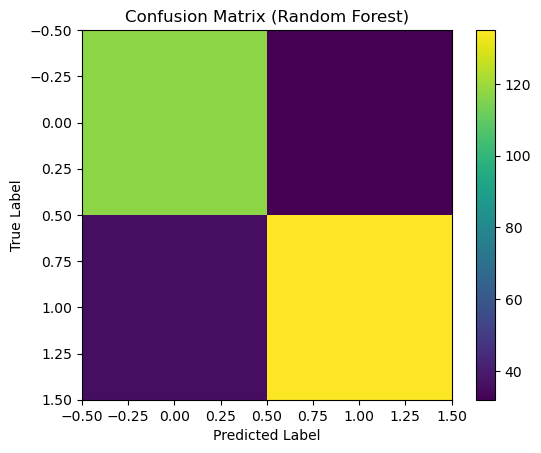

In [1]:
# Ensemble Learning: Random Forest Classification on Wine Quality Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Convert quality to binary classification
# 1 = high quality (>= 6), 0 = low quality (< 6)
X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int)

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Random Forest Model
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

# Train model
rf.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
print("=== Random Forest (Ensemble Model) ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm = confusion_matrix(y_test, y_test_pred)

plt.imshow(cm)
plt.title("Confusion Matrix (Random Forest)")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Summary & Discussion

#We applied an **Ensemble Learning** method using a **Random Forest classifier** to predict wine quality. Random Forests combine multiple Decision Trees trained on different bootstrap samples to improve generalization.

#**Key Points:**
#- Ensemble learning reduces overfitting compared to a single Decision Tree.
#- Random Forests capture complex, non-linear relationships without feature scaling.
#- The model achieved improved test accuracy relative to individual tree-based models.

#**Limitations:**
#- Less interpretable than a single Decision Tree.
#- Increased computational cost due to training many trees.
#- Hyperparameter tuning can be time-consuming.

#**Potential Improvements:**
#- Tune the number of trees and depth using cross-validation.
#- Explore Gradient Boosting or XGBoost.
#- Analyze feature importance for interpretability.

#**Conclusion:**
#Ensemble methods like Random Forests provide strong predictive performance by aggregating multiple weak learners and represent a powerful advancement over individual models.
